In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing the dataset
df = pd.read_csv('/kaggle/input/titanic/train.csv')

In [4]:
# Shape
df.shape

(891, 12)

In [5]:
# previewing the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# listing down the column
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Categorical column
- Survived
- Pclass
- Sex
- SibSp
- ParCh
- Embarked

### Numerical column
- PassengerId
- Age
- Fare

### Mixed column
- Name
- Ticket
- Cabin

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Conclusion

# 1. Missing values in Age, Cabin, Embarked
# 2. More than 70 percent value missing in Cabin, so we will have to drop it
# 3. Few columns have inappropriate data type

In [10]:
# Dropping cabin column, it have more than 70 percent missing values
df.drop(columns=['Cabin'], inplace=True)

In [11]:
# Imputing missing values in Embarked using mode
df['Embarked'].fillna(df['Embarked'].mode().values[0], inplace=True)

In [12]:
# Imputing missing values in Age using mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [13]:
# Changing the data type as per required
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Age'] = df['Age'].astype('int')
df['Embarked'] = df['Embarked'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


In [14]:
# five point summary
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


### Univariate Analysis

61.62 percent peple died out of 891


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


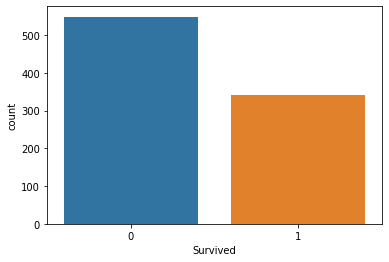

In [15]:
# Univariate analysis on Survived
sns.countplot(df['Survived'])
death_count = round((df['Survived'].value_counts()[0]/df['Survived'].count())*100,2)
print('{} percent peple died out of 891'.format(death_count))

Class wise percentage of people traveling


3    55.11
1    24.24
2    20.65
Name: Pclass, dtype: float64

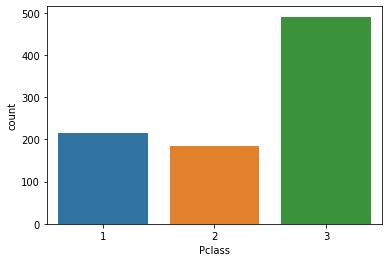

In [16]:
# Univariate on Pclass
sns.countplot(x = df['Pclass'])
print('Class wise percentage of people traveling')
round((df['Pclass'].value_counts()/df['Pclass'].count())*100,2)

# Conclusion -> maximum people traveling in Pclass 3

Male and female percentage in ship


male      64.76
female    35.24
Name: Sex, dtype: float64

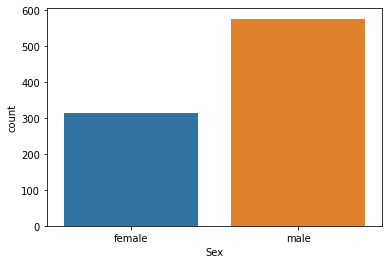

In [17]:
# Univariate on Sex
sns.countplot(x=df['Sex'])
print('Male and female percentage in ship')
round((df['Sex'].value_counts()/df['Sex'].count())*100,2)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

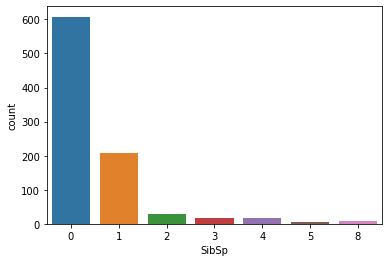

In [18]:
# Univariate on SibSp
sns.countplot(x=df['SibSp'])
df['SibSp'].value_counts()

Percentage people traveling alone and thier parent or child


0    76.09
1    13.24
2     8.98
5     0.56
3     0.56
4     0.45
6     0.11
Name: Parch, dtype: float64

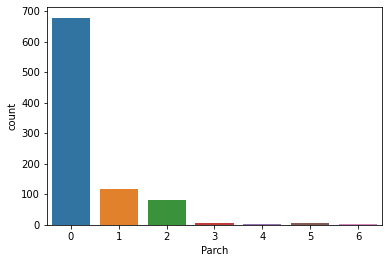

In [19]:
# Univariate on Parch
sns.countplot(x=df['Parch'])
print('Percentage people traveling alone and thier parent or child')
round((df['Parch'].value_counts()/df['Parch'].count())*100,2)

# Conclusion --> there were maximum people traveling solo

People percentage of Embarked


S    72.50
C    18.86
Q     8.64
Name: Embarked, dtype: float64

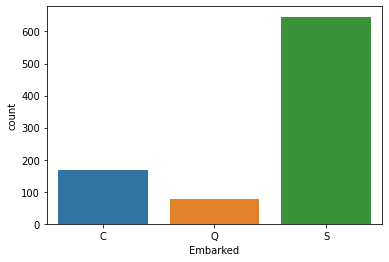

In [20]:
# Univariate on Emabarked
sns.countplot(x=df['Embarked'])
# df['Embarked'].value_counts().plot(kind='bar')
print('People percentage of Embarked')
round((df['Embarked'].value_counts()/df['Embarked'].count())*100,2)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.45956263424701577
0.9865867453652877


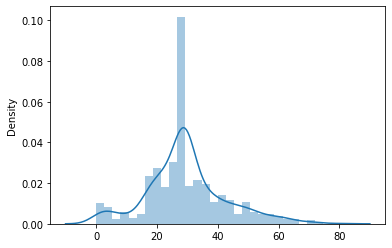

In [21]:
# Univariate on age column
# df['Age'].plot(kind='hist')
sns.distplot(x=df['Age'])
print(df['Age'].skew())
print(df['Age'].kurt())

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

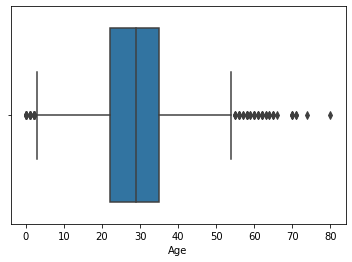

In [22]:
sns.boxplot(df['Age'])

In [23]:
# just for Curiosity
print('People in Age range of 60 to 70 are ', df[(df['Age']>60) & (df['Age']<=70)].shape[0])
print('People in Age range of 71 to 75 are ', df[(df['Age']>70) & (df['Age']<=75)].shape[0])
print('People in Age gretar than 75 are ', df[df['Age']>75].shape[0])

print('-'*50)

print('Childrens whose age below 1 year are ', df[df['Age']<1].shape[0])

People in Age range of 60 to 70 are  18
People in Age range of 71 to 75 are  3
People in Age gretar than 75 are  1
--------------------------------------------------
Childrens whose age below 1 year are  7


#####  conclusion
- For all practicle purposes age can be considered as normal distribution
- Deeper analysis required for outlier detection

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


4.787316519674893
33.39814088089868


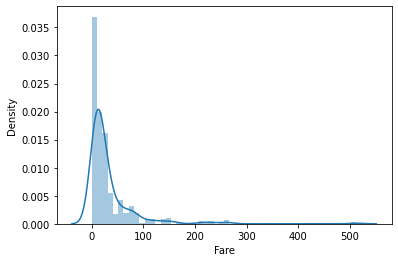

In [24]:
# Univariate Analysis on Fare
sns.distplot(df['Fare'])
print(df['Fare'].skew())
print(df['Fare'].kurt())

# conclusion  --> Right Skewed

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Fare'>

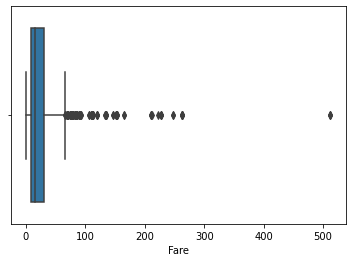

In [25]:
sns.boxplot(df['Fare'])

In [26]:
print('People whose fare is in range of  200 to 300 are ', df[(df['Fare']>200) & (df['Fare']<300)].shape[0])
print('People whose Fare is greatar than 300 are ', df[df['Fare']>300].shape[0])

People whose fare is in range of  200 to 300 are  17
People whose Fare is greatar than 300 are  3


#####  Conclusion 
- Highly Skewed data, a lot of people had cheaper ticket
- Outlier are thier in data

###  Multivariate Analysis

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363
All,0.616162,0.383838


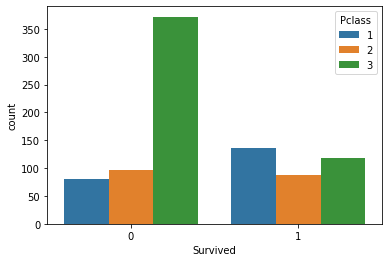

In [27]:
# Multivariate on Survival and Pclass                      # one Numerical and one categorical
sns.countplot(df['Survived'], hue=df['Pclass'])
pd.crosstab(df['Pclass'],df['Survived'], margins=True,normalize='index')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Sex,female,male
Survived,,
0,25.8,81.11
1,74.2,18.89


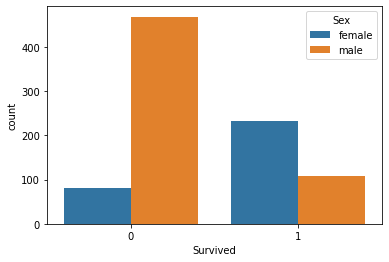

In [28]:
# Survival With Sex
sns.countplot(df['Survived'], hue=df['Sex'])
pd.crosstab(df['Survived'],df['Sex'],).apply(lambda x: round((x/x.sum())*100,2), axis=0)

#####  Conclusion
- the men is to women dying ration is 3:1
- the men is to women serviving ratio is 1:4

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Embarked,C,Q,S
Survived,,,
0,44.64,61.04,66.1
1,55.36,38.96,33.9


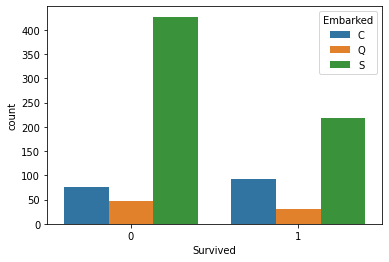

In [29]:
# Multivariate Analysis on Survial and Embarked
sns.countplot(df['Survived'], hue=df['Embarked'])
pd.crosstab(df['Survived'], df['Embarked']).apply(lambda x: round((x/x.sum())*100,2), axis=0)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


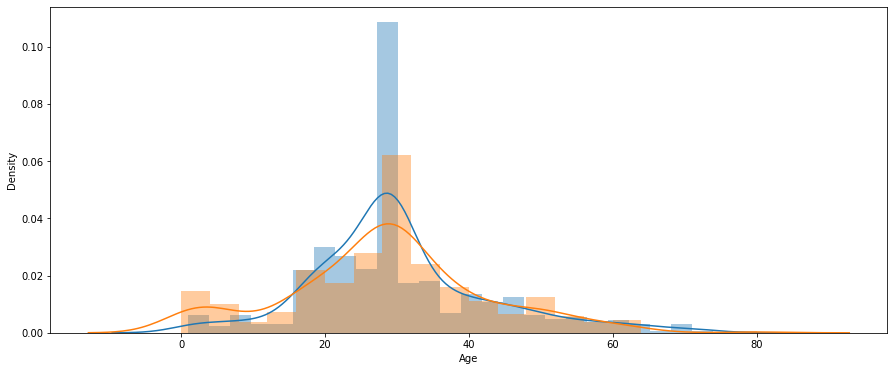

In [30]:
# Multivariate of age with 
plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

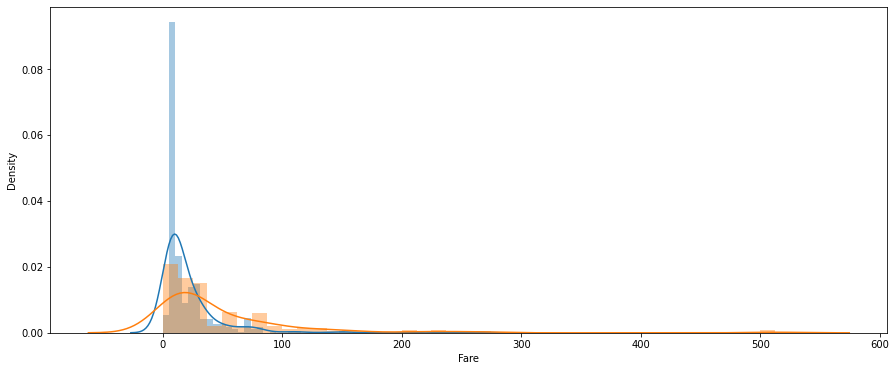

In [31]:
plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Fare'])
sns.distplot(df[df['Survived']==1]['Fare'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


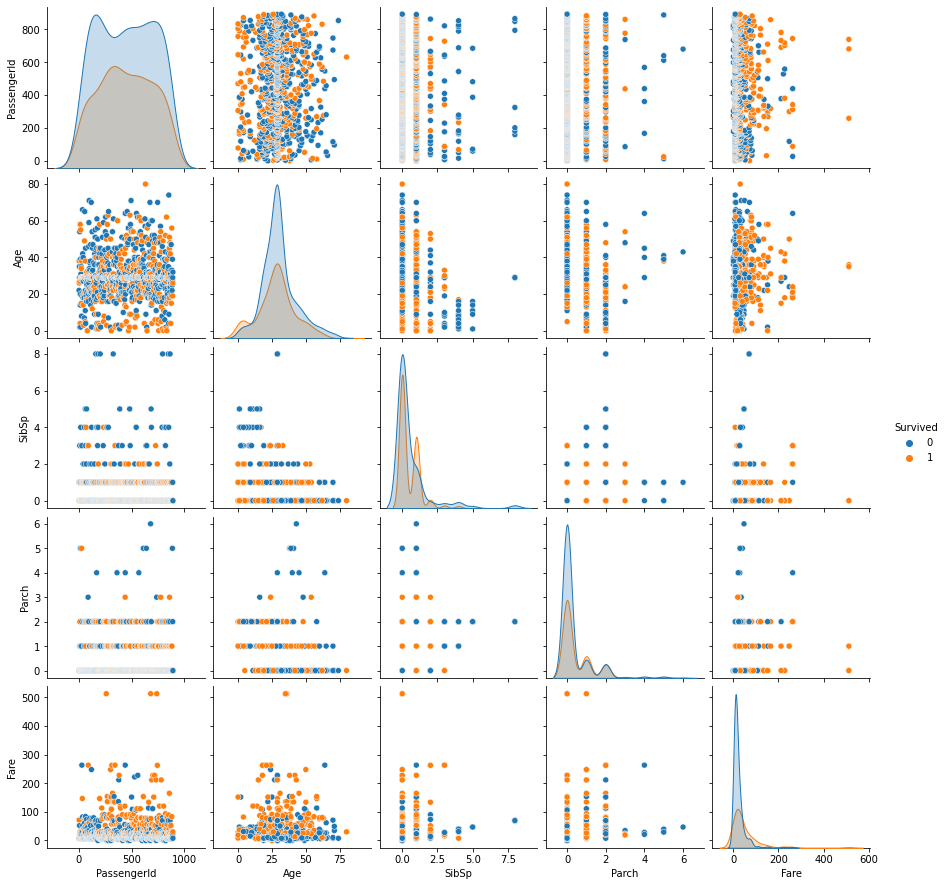

In [32]:
sns.pairplot(df, 'Survived')

In [33]:
# correlation and thier heatmap
df.corr()

,PassengerId,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.033741,-0.057527,-0.001652,0.012658
Age,0.033741,1.000000,-0.232743,-0.176744,0.093856
SibSp,-0.057527,-0.232743,1.000000,0.414838,0.159651
Parch,-0.001652,-0.176744,0.414838,1.000000,0.216225
Fare,0.012658,0.093856,0.159651,0.216225,1.000000


<AxesSubplot:>

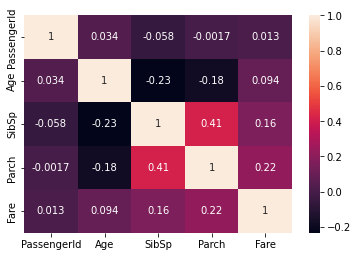

In [34]:
sns.heatmap(df.corr(), annot=True)

####  Feature Enginering

In [35]:
# we will create new column family which sum of Parch and SibSp

df['Family'] = df['SibSp'] + df['Parch']

In [36]:
# now we will engineer new feature which is family type

def family_type(number):
    if number==0:
        return 'Alone'
    elif number>0 and number<=4:
        return 'Medium'
    else:
        return 'Large'

In [37]:
df['Family_type'] = df['Family'].apply(family_type)

In [38]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,Family_type
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52,1,0,36947,78.2667,C,1,Medium
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11,4,2,347082,31.2750,S,6,Large
319,320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40,1,1,16966,134.5000,C,2,Medium
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15,0,0,2667,7.2250,C,0,Alone
254,255,0,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41,0,2,370129,20.2125,S,2,Medium


In [39]:
# droping SibSp, Parch, and family

df.drop(columns=['SibSp','Parch','Family'], inplace=True)

In [40]:
# multivariate using new column family type
pd.crosstab(df['Survived'],df['Family_type']).apply(lambda x: round((x/x.sum())*100,1), axis=0)

Family_type,Alone,Large,Medium
Survived,,,
0,69.6,85.1,44.0
1,30.4,14.9,56.0


### Detecting Outlier

#### Numerical Data
- if the data is following normal distribution, anything beyond   3*SD - mean + 3*SD can be considered as an outlier
- if the data does not follow normal distribution, using boxplot we can eliminate points beyond Q1 - 1.5 * IQR and Q3 + 1.5 * IQR

#### Categorical data
- If the col is highly imbalnced for eg male 10000 and female 2 then we can eliminate female

In [41]:
# Handling outlier from Age column
df=df[df['Age']<(df['Age'].mean() + 3 * df['Age'].std())]

In [42]:
# Handling outlier from Fare column
Q1 = np.percentile(df['Fare'],25)
Q3 = np.percentile(df['Fare'],75)

outlier_low = Q1 - 1.5*(Q3-Q1)
outlier_high = Q3 + 1.5*(Q3-Q1)

df = df[(df['Fare']>outlier_low) & (df['Fare']<outlier_high)]

In [43]:
# One hot encoding

df.sample(4)

# Cols to be transformed are Pclass, Sex, Embarked, family_type

pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','Family_type'], drop_first=True)

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_type_Large,Family_type_Medium
0,1,0,"Braund, Mr. Owen Harris",22,A/5 21171,7.2500,0,1,1,0,1,0,1
2,3,1,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7.9250,0,1,0,0,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53.1000,0,0,0,0,1,0,1
4,5,0,"Allen, Mr. William Henry",35,373450,8.0500,0,1,1,0,1,0,0
5,6,0,"Moran, Mr. James",29,330877,8.4583,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27,211536,13.0000,1,0,1,0,1,0,0
887,888,1,"Graham, Miss. Margaret Edith",19,112053,30.0000,0,0,0,0,1,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29,W./C. 6607,23.4500,0,1,0,0,1,0,1
889,890,1,"Behr, Mr. Karl Howell",26,111369,30.0000,0,0,1,0,0,0,0


In [44]:
df = pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','Family_type'], drop_first=True)

<AxesSubplot:>

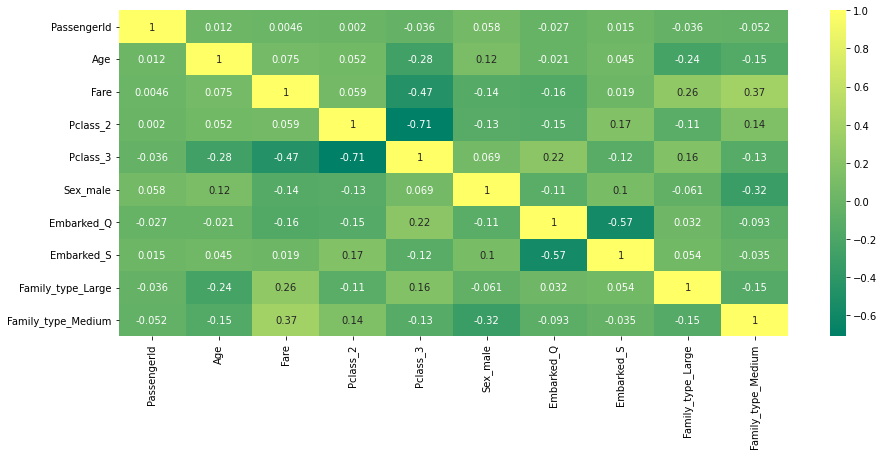

In [45]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True, cmap='summer')

## Drawing Conclusions

- Chance of female survival is higher than male survival
- Travelling in Pclass 3 was deadliest
- Somehow, people going to C survived more
- People in the age range of 20 to 40 had a higher chance of not surviving
- People travelling with smaller familes had a higher chance of surviving the accident in comparison to people with large families and travelling alone

## Communicating Results

- You can write a report/blog etc
- You can give a PPT in front of others
- You can describe the results face to face
